# 作業
- 作業目標 : 用 iris (dataset.load_iris()) 資料嘗試跑 hierarchical clustering

In [49]:
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt

In [69]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

載入 相關套件 並 執行 hierarchical clustering 實驗 ...

In [70]:
#設定 模型 估計參數
estimators = [('hc_ward', AgglomerativeClustering(n_clusters=3, linkage="ward")),
              ('hc_complete', AgglomerativeClustering(n_clusters=3, linkage="complete")),
              ('hc_average', AgglomerativeClustering(n_clusters=3, linkage="average"))]

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 2 2 0 2 0 2 2 0 2 0 2 0 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 0 2 2 2 0 2 2 2 2 2 0 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


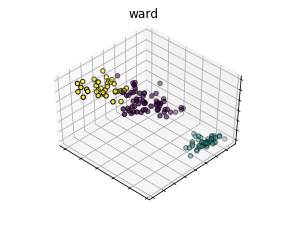

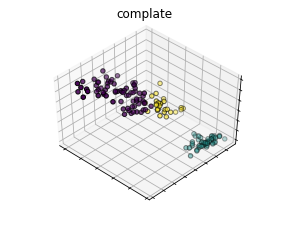

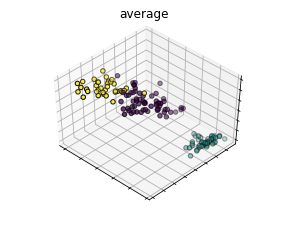

In [71]:
fignum = 1
titles = ['ward', 'complate', 'average']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    
    ## fit data
    est.fit(X)
    
    labels = est.labels_
    print(labels)

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1


In [72]:
X[y == 1, 0]

array([7. , 6.4, 6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. ,
       6.1, 5.6, 6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6,
       6.8, 6.7, 6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6,
       5.5, 5.5, 6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7])

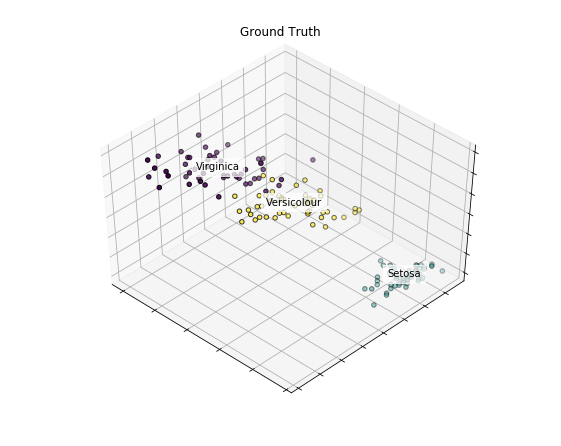

In [73]:
# Plot the ground truth
fig = plt.figure(fignum, figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)


for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.7, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 12

#fig.show()